## Linear models for heavy tailed data with outliers 

The first task to understand our data is plotting x, y and see the dispersion, distribution and residuals from our model r = y -yhat. (yhat or y_predicted). If the mean of the residuals is not zero, then there is an underlying process to be studied. 
We first do regular OLS and see if the coef. of determination R2 (best metric to assess a model in general when having linear models) shows a good fit quality (the closer to 1 the better, i.e., the model explains all the variance in our data). If residuals do not have mean 0 (i.e., the noise is not random), such as in our case, there is a process to study and room for improvement in our model on the outliers.


A good choice when data like ours has fat tails is Huber Loss function, used in robust regression, that is less sensitive to outliers than the squared error loss. Huber loss function is quadratic for small values of a, and linear for large values (it is defined piecewise). Because the squared loss has the disadvantage that it has the tendency to be dominated by outliers and its mean is poor for heavy-tailed distributions, after the different models tested on OLS and other regularization mthods below, we conclude using Huber loss function, which is used in robust statistics, M-estimation and additive modelling.


REFERENCES


<li> http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm.html


<li>Robust regression: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/robust_models_1.html


DEPENDENCY LIBRARIES:

<li>http://minepy.readthedocs.io/en/latest/

<li>minepy - Maximal Information-based Nonparametric Exploration — 

<li>statsmodels https://github.com/statsmodels/statsmodels/

In [6]:
import pandas as pd
import numpy as np
import seaborn
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
# huge images can't be displayed on a screen, so directly use Agg
import matplotlib
matplotlib.use("Agg")
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor
import statsmodels.api as sm
#import statsmodels.formula.api as smf
from scipy import stats
from DataSciency import DataSciency
import os, sys

% matplotlib inline
%load_ext autoreload
%autoreload 2

d = DataSciency()

train_sets = []
files = []
max_score = float('-inf') # r2
max_score_params = []
best_name ="no model assessed yet"

for filename in os.listdir("./heavy_tailed_data/"):
    if filename.endswith(".csv"):
        files.append(filename)
        train_sets.append(pd.read_csv('./heavy_tailed_data/'+filename, header= 0))#, names = ['x','y']))
        
train = train_sets[0]                    
col_names = train.columns.values
print col_names
train.head(5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['x' 'y']


,x,y
0,-2.344913,-0.553881
1,-1.278761,-2.904648
2,0.728534,4.404360
3,4.082078,-27.008035
4,-2.983181,6.456532


100  values for Y train -unique:  100
100  values for X test -unique:  100
z value and p value: 
Not normal distribution


(21.271555956508998, 2.4040323822009097e-05)

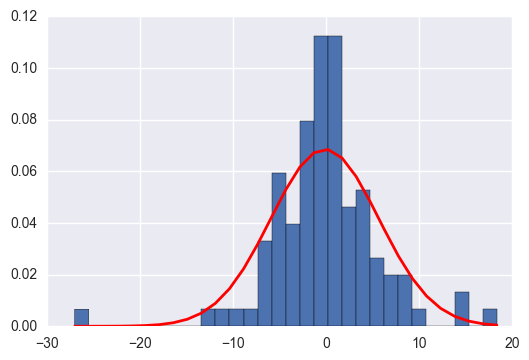

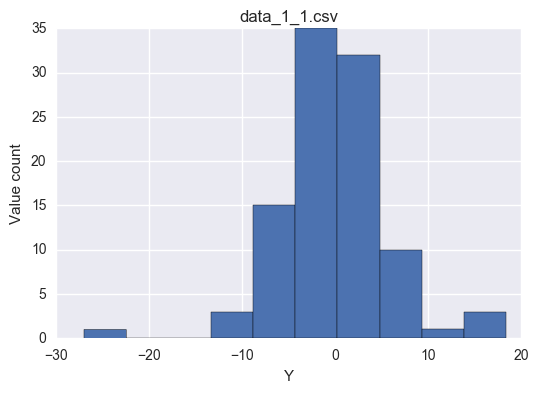

100  values for Y train -unique:  100
100  values for X test -unique:  100
z value and p value: 
Not normal distribution


(15.716127192386375, 0.00038662180292056643)

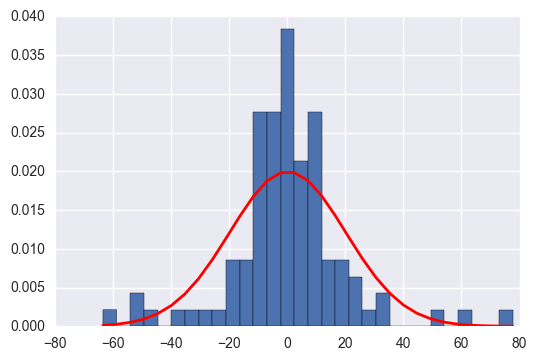

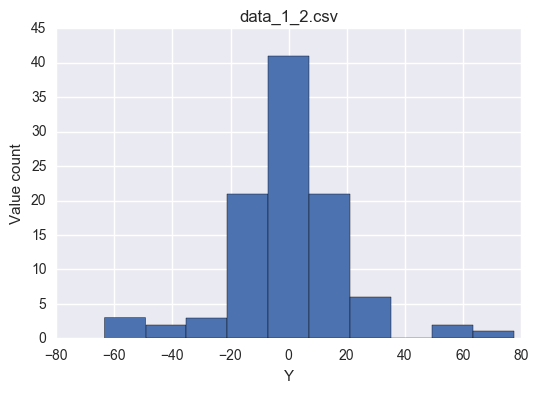

50  values for Y train -unique:  50
50  values for X test -unique:  50
z value and p value: 
Not normal distribution


(24.932633830407681, 3.8543163214293787e-06)

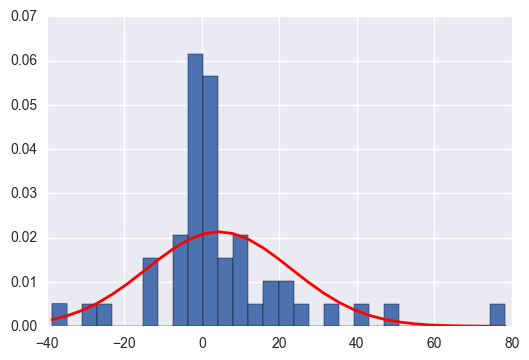

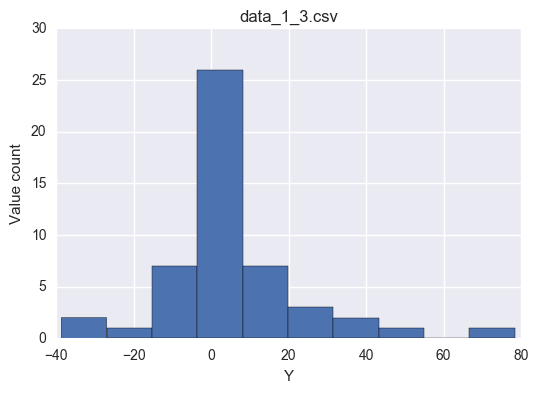

50  values for Y train -unique:  50
50  values for X test -unique:  50
z value and p value: 
Not normal distribution


(7.2774975435981641, 0.026285212197339074)

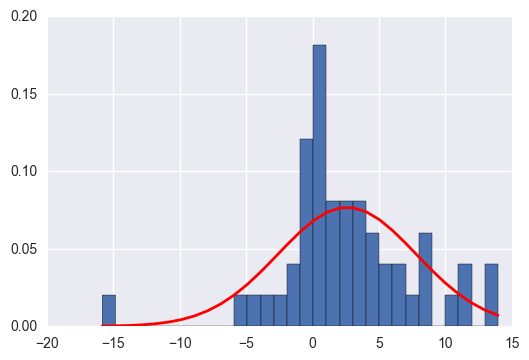

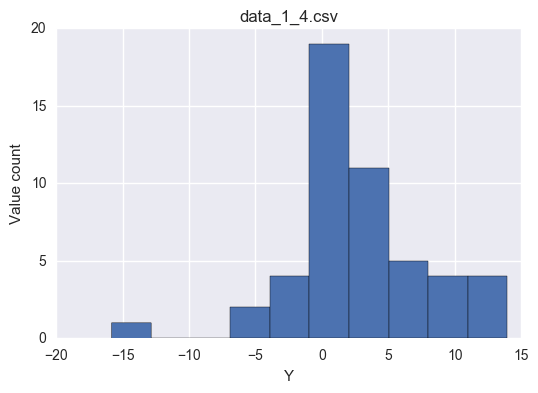

50  values for Y train -unique:  50
50  values for X test -unique:  50
z value and p value: 
Not normal distribution


(33.633596507475993, 4.9722999030101497e-08)

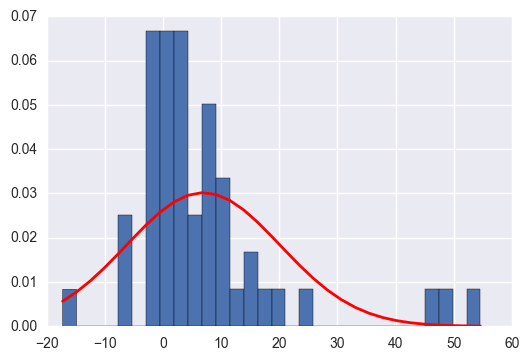

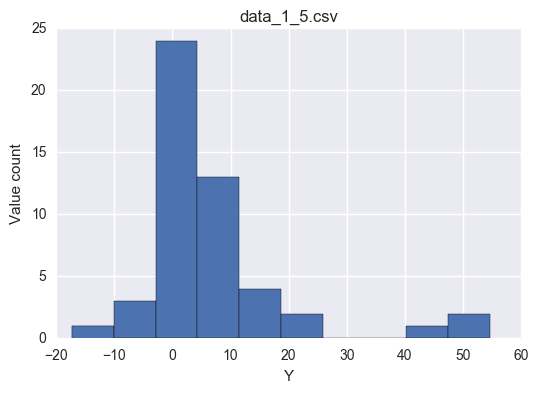

In [7]:
# data visualization and normality tests
for data, filename in zip(train_sets, files):
    x=data.iloc[:,0]
    y=data.iloc[:,1]
    print len(y), " values for Y train -unique: ", len(set(list(y)))
    print len(x), " values for X test -unique: ", len(set(list(x)))  
    d.test_normality(y)
    d.visualize_normality_for_sample(y)
    d.plot_histogram(y, filename)

### FEATURE CORRELATION
Pearson correlation coefficient ρ -rho- (if it exists, in [-1,1]) does not assume normality, but is only an exhaustive measure of association if the joint distribution is multivariate normal. Given the failed normality test in our case, another option can be using Spearman’s s or Kendall’s tau. Spearman’s rho can be less reliable and interpretable than Kendall’s while Spearman rho is easier to compute).

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000  0.516916
y  0.516916  1.000000
--------------- CREATE A HEATMAP ---------------


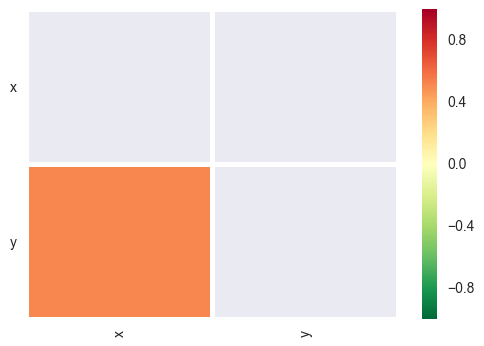

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000  0.408081
y  0.408081  1.000000
--------------- CREATE A HEATMAP ---------------


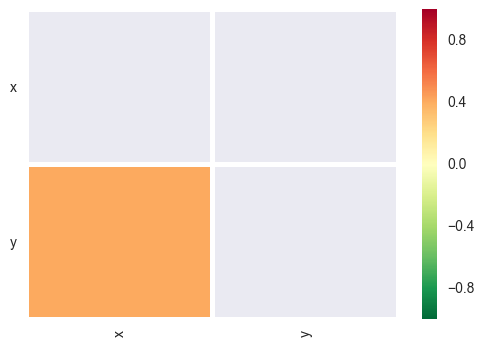

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000  0.774761
y  0.774761  1.000000
--------------- CREATE A HEATMAP ---------------


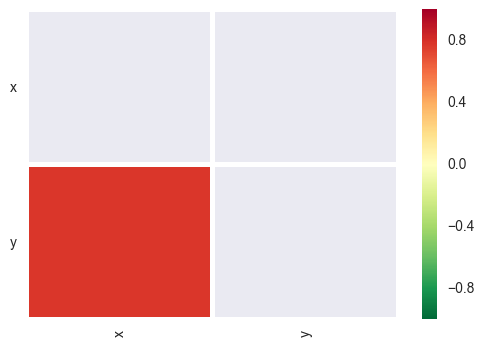

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000  0.620202
y  0.620202  1.000000
--------------- CREATE A HEATMAP ---------------


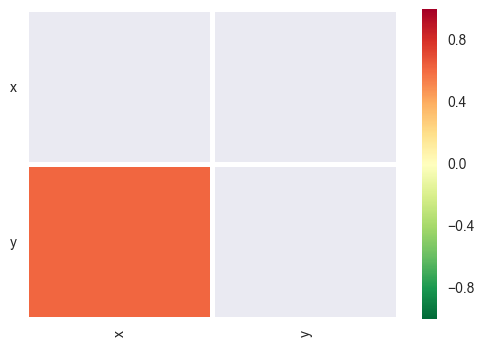

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000 -0.464394
y -0.464394  1.000000
--------------- CREATE A HEATMAP ---------------


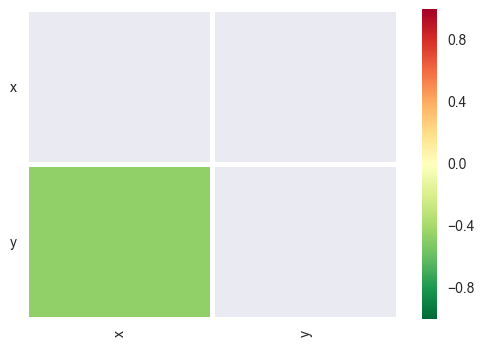

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000 -0.382857
y -0.382857  1.000000
--------------- CREATE A HEATMAP ---------------


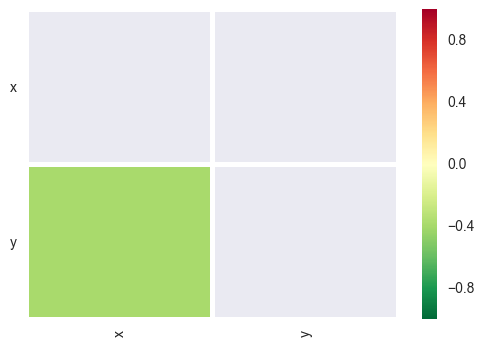

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000  0.259928
y  0.259928  1.000000
--------------- CREATE A HEATMAP ---------------


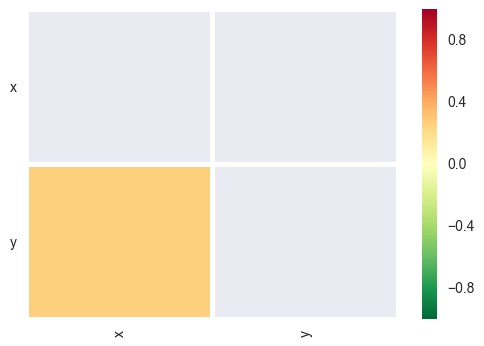

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000  0.191837
y  0.191837  1.000000
--------------- CREATE A HEATMAP ---------------


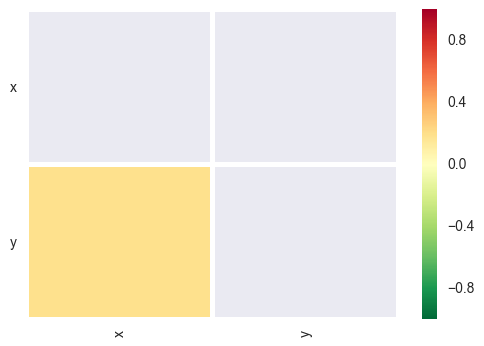

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000 -0.509724
y -0.509724  1.000000
--------------- CREATE A HEATMAP ---------------


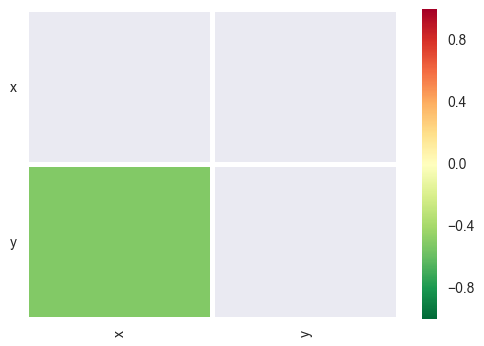

initial columns  ['x' 'y']
cols_to_consider ['x', 'y']
Df to perform correlation analysis: 
['x' 'y']
--------------- CORRELATIONS ---------------
          x         y
x  1.000000 -0.386122
y -0.386122  1.000000
--------------- CREATE A HEATMAP ---------------


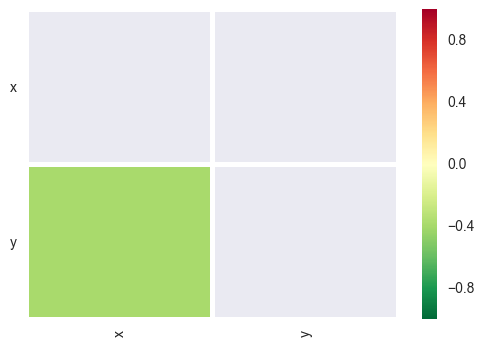

In [8]:
for filename, data in zip(files,train_sets):
    d.visualize_feature_correlations(data, 'spearman') #'pearson') # assumes Normal distrib. (not in this case)
    d.visualize_feature_correlations(data, 'kendall')

### Ordinary Least Squares (OLS), Linear Regressors and Regularizers, and Generalized linear model (GLM) 
A flexible generalization of ordinary linear regression (OLR) that allows for response variables that have error distribution models other than a normal distribution. The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a link function and by allowing the magnitude of the variance of each measurement to be a function of its predicted value. They unify various other statistical models, including linear regression, logistic regression and Poisson regression and are commonly solved using IRLSR (iteratively reweighted least squares method) for maximum likelihood estimation of the model parameters.

data_1_1.csv  OLS Parameters:  [ 0.88080879 -0.26952651]  R2:  0.163986312281
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.22
Date:                Wed, 11 Jan 2017   Prob (F-statistic):           2.93e-05
Time:                        12:51:04   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             621.1
Df Residuals:                      98   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------

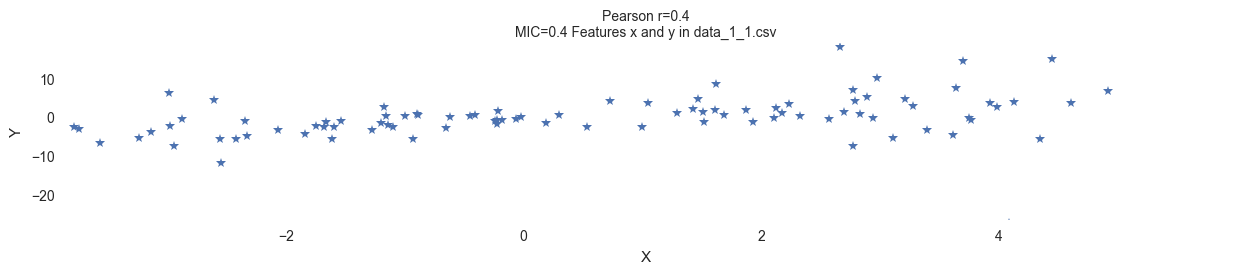

data_1_2.csv  OLS Parameters:  [ 1.28560303 -0.39585339]  R2:  0.398089441097
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     64.81
Date:                Wed, 11 Jan 2017   Prob (F-statistic):           1.98e-12
Time:                        12:51:05   Log-Likelihood:                -415.48
No. Observations:                 100   AIC:                             835.0
Df Residuals:                      98   BIC:                             840.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------

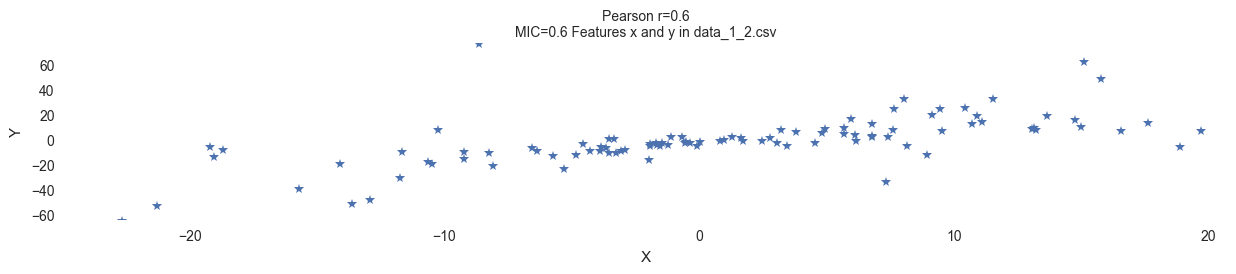

data_1_3.csv  OLS Parameters:  [-0.53784957  4.175155  ]  R2:  0.1031999573
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.524
Date:                Wed, 11 Jan 2017   Prob (F-statistic):             0.0229
Time:                        12:51:06   Log-Likelihood:                -214.11
No. Observations:                  50   AIC:                             432.2
Df Residuals:                      48   BIC:                             436.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------

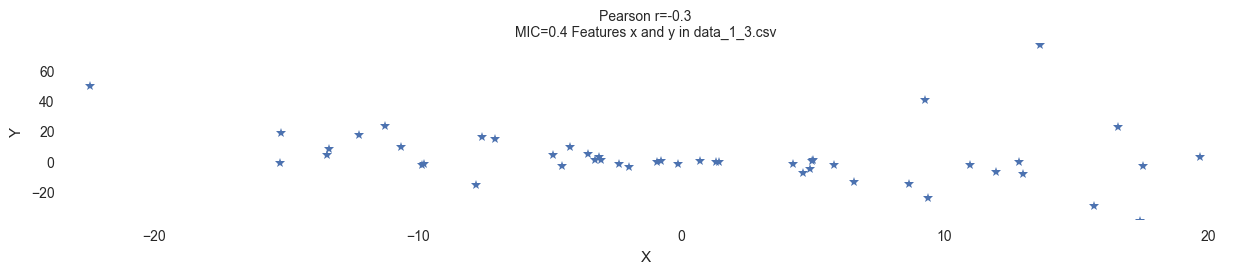

data_1_4.csv  OLS Parameters:  [ 0.63337555  1.14813132]  R2:  0.027594735935
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.362
Date:                Wed, 11 Jan 2017   Prob (F-statistic):              0.249
Time:                        12:51:06   Log-Likelihood:                -152.15
No. Observations:                  50   AIC:                             308.3
Df Residuals:                      48   BIC:                             312.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------

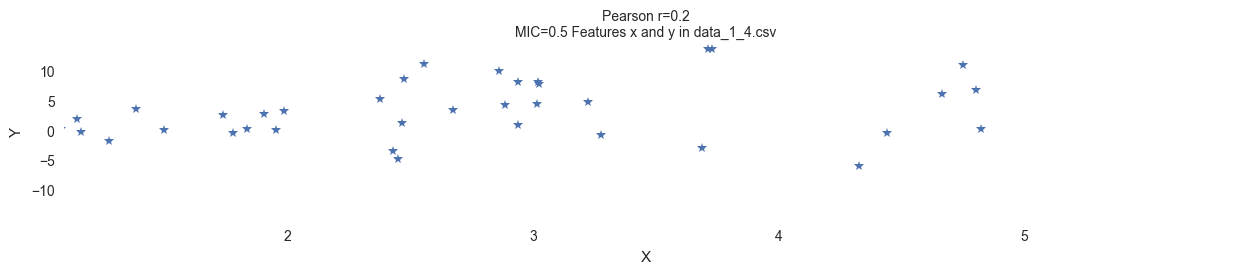

data_1_5.csv  OLS Parameters:  [-1.33306888 -0.24130463]  R2:  0.28057579266
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     18.72
Date:                Wed, 11 Jan 2017   Prob (F-statistic):           7.63e-05
Time:                        12:51:07   Log-Likelihood:                -191.30
No. Observations:                  50   AIC:                             386.6
Df Residuals:                      48   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------

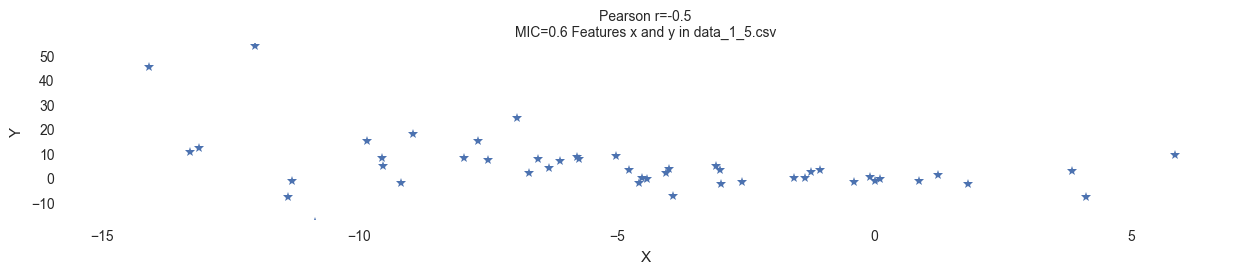

IOError: [Errno 2] No such file or directory: './output/regression_results.csv'

In [9]:
def update_best_model_score_and_params(name, model, params, current_score, max_score):
    if current_score > max_score:
        max_score = current_score
        max_score_params = params
        best_model = model
        best_name = name

# Data models 
best_model = None
alpha = 0.5 #[0.5, 1.0]
ridge = Ridge(alpha=alpha, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=1000)
l1_ratios = [0.5, 0.7]
EN = ElasticNet(alpha=alpha, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# Distribution Families
# Family(link, variance)	The parent class for one-parameter exponential families.
# Binomial([link])	Binomial exponential family distribution.
# Gamma([link])	Gamma exponential family distribution.
# Gaussian([link])	Gaussian exponential family distribution.
# InverseGaussian([link])	InverseGaussian exponential family.
# NegativeBinomial([link, alpha])	Negative Binomial exponential family.
# Poisson([link])	Poisson exponential family.

exp_family_distribs = [sm.families.Gaussian(), sm.families.Gamma()]#, sm.families.InverseGaussian()]#, sm.families.NegativeBinomial(), sm.families.Poisson()] # sm.families.Binomial(),
linear_models = [ridge, lasso, EN]
filenames_log=[]; a_params=[]; b_params = []; r2_logs=[]; model_logs=[];
# Link functions per family (Not all link functions are available for each distribution family). 
# The list of available link functions can be obtained by   sm.families.family.<familyname>.links
for data, filename in zip(train_sets, files):
    max_score = float('-inf') # r2
    max_score_params = []
    best_name ="no model assessed yet"
    
    x, y = d.get_xy_reshaped_for_numpy(data)
    
    # Linear models
    ###### Ordinary Least Squares (OLS) ###############################
    # An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant.
    X = sm.add_constant(x, prepend=False)
    OLS = sm.OLS(y,X)
    model = OLS.fit()
    params = model.params
    r2 = model.rsquared
    print filename,' OLS Parameters: ', params, ' R2: ', r2
    print(model.summary())
    
    update_best_model_score_and_params("OLS", model, params, r2, max_score)
    filenames_log.append(filename); a_params.append(params[0]); b_params.append(params[1]); r2_logs.append(r2); model_logs.append(model); 
    
    #### 
    d.OLS_nonlinear_curve_but_linear_in_params(x, y)
    
    #### Regularizer regressors ######################################
    for regressor, name in zip([ridge, lasso, EN], ['Ridge','Lasso','ElasticNet']):
        model = d.fit_model(regressor, x, y, file)
        coef = model.coef_.tolist() 
        if isinstance(coef[0], list):
            coef = coef[0][0]
        else:
            coef = coef[0]
        intercept = model.intercept_.tolist()[0] #np.asmatrix(model.intercept_)[0]
        params = [coef, intercept]
        y_pred = model.predict(x)
        r2 = r2_score(y, y_pred) #regressor.rsquared
        print filename,' Regularizer Parameters: ', params, ' R2: ', r2, ' coef and intercept: ',coef, intercept
        update_best_model_score_and_params("Regressor"+name, model, params, r2, max_score)
        filenames_log.append(filename); a_params.append(params[0]); b_params.append(params[1]); r2_logs.append(r2); model_logs.append(model); 
    
    #### GLM #########################################################
    for family in exp_family_distribs:
        glm = sm.GLM(y, x, family=family)
        model = glm.fit()  
        params = model.params
        if len(params)==1:
            params = [params.tolist()[0], 0]
        # LLF: float Value of the loglikelihood function evalued at params.
        print filename," GLM family parameters: ",family,':\n', params, "\nLLF and Pearson Chi2: ",model.llf,' ', model.pearson_chi2,'\n', model.summary()
        update_best_model_score_and_params("GLM_Family_"+str(family), model, params, r2, max_score)
        #filenames_log.append(filename); a_params.append(params[0]); b_params.append(params[1]); r2_logs.append(r2); model_logs.append(model); 
    
    print filename+" Best r2 and params: ",max_score, max_score_params,"\n",best_model, best_name    
    # PLOT MIC
    d.plot_covariance_based_mutual_info_for_categorical_correlations(data, filename)

df = pd.DataFrame({'filename':filenames_log,'a': a_params, 'b':b_params, 'r2': r2_logs,
              'model_name':model_logs})
df = df[['filename','a','b','r2','model_name']]
df.to_csv("./output/regression_results.csv")    

###   Robust Linear Regression (RLM) using loss functions: Median Absolute Deviation (MAD) and Huber Loss
Because we have fat tails in our distribution, and predictions in ridge are strongly influenced by the outliers present in the dataset, we apply he Huber regressor, which is less influenced by the outliers since the model uses the linear loss for these. As the parameter epsilon is increased for the Huber regressor, the decision function approaches that of the ridge. The metrics to use are:

<li> Huber loss function ('huber' in sklearn.linear_model.SGDRegressor) modifies ‘squared_loss’ to focus less on getting outliers correct by switching from squared to linear loss past a distance of epsilon.
<li> bse: An array of the standard errors of the parameters.  The standard errors are taken from the robust covariance matrix specified in the argument to fit.
<li> chisq : An array of the chi-squared values of the parameter estimates.
<li> M-estimation in Robust regression stands for "maximum likelihood type"
<li> Median Absolute Deviation (MAD): sm.robust.scale.stand_mad(x)  or sm.robust.stand_mad(fat_tails) (alternative to Huber's proposal 2 to estimate location and scale: loc, scale = sm.robust.scale.Huber())


We look mainly at R_squared, coef. of determination, comparable accross different models, once we have optimized the model for the Huber loss function. 
<li> R^2 is the percentage of the response variable variation that is explained by a linear model:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. In practice, R_squared's best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0. R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots. 
NOTE: While R-squared provides an estimate of the strength of the relationship between the model and the response variable, it does not provide a formal hypothesis test for this relationship. We can look at the F-test of overall significance, which determines whether this relationship is statistically significant.

In [ ]:
def Huber_regression(x,y, filename):
    """
    Huber regression with scikit-learn
    Since ridge is strongly influenced by the outliers present in the dataset, Huber regressor 
    is less influenced by the outliers since the model uses the linear loss for these. 
    The HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified 
    as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain 
    threshold epsilon. As the parameter epsilon is increased for the Huber regressor, 
    the decision function approaches that of the ridge.
    -Uses Huber loss and returns the fitted model, the coefficients and the r2 coef of determination, best epsilon and alpha
    """
    plt.plot(x, y, 'b.')

    # Fit the huber regressor over a series of epsilon values.
    colors = ['r-', 'b-', 'y-', 'm-']
    best_r2 = float('-inf') # the closer to 1, the better fit the model provides
    alpha = best_alpha = 0.0 # default #for alpha in [0.0001, 0.1, 1.0, 10.0, 0.001, 0.01, 0.0]:
    best_coef = [-1, -1] 
    epsilon_values = [1.35, 1.5, 1.75, 1.9]
    for k, epsilon in enumerate(epsilon_values):
        huber = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,
                               epsilon=epsilon)
        fitted = huber.fit(x, y)
        coef_ = huber.coef_ * x + huber.intercept_
        plt.plot(x, coef_, colors[k], label=("Huber loss, epsilon %s, alpha %s" % (epsilon, best_alpha)))
        intercept = huber.intercept_  #params.append(intercept)
        r2 = fitted.score(x, y)  
        if r2 > best_r2:
            best_coef = params
            best_intercept = huber.intercept_
            best_r2 = r2
            best_fitted = fitted
            best_epsilon = epsilon
            best_alpha = alpha
    
    # Fit a ridge regressor to compare it to huber regressor.
    ridge = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
    ridge.fit(x, y)
    coef_ridge = ridge.coef_
    coef_ = ridge.coef_ * x + ridge.intercept_
    plt.plot(x, coef_, 'g-', label="ridge regression")

    plt.savefig('./output/HuberRegressorVSRidge_'+filename.replace('.csv','.png'))
    plt.title("Comparison of Huber Regressor vs Ridge: "+filename)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc=1, scatterpoints=1)#numpoints = 1) bbox_to_anchor=(1, 0.5))#loc=1) loc= 'upper left'#plt.legend(loc=0)
    plt.show()
    
    print " Best Huber Regr. fitted model had ", best_coef," coefficients, intercept: ",best_intercept
    print " R2: ", best_r2," alpha: ", best_alpha, " and epsilon= ", best_epsilon
    return best_fitted, best_coef, best_r2, best_epsilon, best_alpha

filenames_log=[]; a_params=[]; b_params = []; r2_logs=[]; model_logs=[]; epsilons = []; alphas = []
for filename, data in zip(files,train_sets):
    x, y = d.get_xy_reshaped_for_numpy(data)
    
    # Huber regression A (no intercepts, and no r2)
    #model, params, r2 = robust_linear_model_Huber_loss_funct(x,y)
    #filenames_log.append(filename); a_params.append(params[0]); b_params.append(params[1]); r2_logs.append(r2); model_logs.append(model); epsilons.append(-1)     
    
    # Huber regression B (my solution)
    model, params, r2, epsilon, alpha = Huber_regression(x,y, filename)
    filenames_log.append(filename); a_params.append(params[0]); b_params.append(params[1]); r2_logs.append(r2); model_logs.append(model); epsilons.append(epsilon); alphas.append(alpha)
    
df = pd.DataFrame({'filename':filenames_log,'a': a_params, 'b':b_params, 'r2': r2_logs,
              'epsilon':epsilons,'alpha': alphas, 'model_name':model_logs})
df = df[['filename','a','b','r2','epsilon','alpha','model_name']]
df.to_csv("./output/robust_regression_results.csv")

### Other Future Models to explore
If all our data would be increasing, and we were not limited to fit a linear model, I would try Isotonic Regression, which finds a non-decreasing approximation of a function while minimizing the MSE (the benefit being that it does not assume any form for the target function such as linearity). 

Further models to explore more:
<li> Generalized Least Squares (GLS)
<li> Ordinary Least Squares (OLS)
<li> Weighted Least Squares (WLS)
<li> Generalized Least Squares with autoregressive error terms GLSAR(p)

<li> ARMA: Auto Regressive Moving Average: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma_0.html
<li> Calculate bounded or unbounded linear least squares curve fit using Moore-Penrose pseudoinverse. http://birota.azurewebsites.net/finding-optimal-dimming-levels-to-match-a-desired-lighting-conditions/
